In [1]:
# dataset
import os
import torch

from starry.utils.config import Configuration
from starry.utils.dataset_factory import loadDataset


torch.set_printoptions(profile="full")

DATA_DIR = os.getenv('DATA_DIR')

config = Configuration.create('configs/score-midi-data.yaml', volatile=True)
data, = loadDataset(config, data_dir=DATA_DIR, splits='*0/1')

it = iter(data)
next(it)


Loading measurewise: 100%|██████████| 12/12 [00:00<00:00, 58.89it/s]


{'input_id': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 21, 31, 40,  7, 10, 70,
          48, 44, 49, 44, 49, 61, 68, 43, 50, 44, 49, 61, 48, 43, 50, 45, 61, 69,
          48, 43, 50, 46, 61, 43, 50, 53, 61, 72, 43, 50, 61, 72,  6,  8, 11, 70,
    

In [2]:

def formatData (batch, i):
	with open('./test/words-midi.csv', 'w') as file:
		file.write(','.join(['', *map(str, range(batch['input_id'].shape[-1]))]) + '\n')
		for key in ['input_id', 'output_id', 'body_mask', 'position']:
			line = ','.join([key, *map(str, batch[key][i].tolist())])
			file.write(line + '\n')


In [6]:
formatData(next(it), 0)

In [4]:
# MidiParaffTranslator
import os
import torch

from starry.utils.config import Configuration
from starry.utils.dataset_factory import loadDataset
from starry.utils.model_factory import loadModel


DATA_DIR = os.getenv('DATA_DIR')

config = Configuration.create('configs/paraff-midi_trans-test.yaml', volatile=True)
train, val = loadDataset(config, data_dir=DATA_DIR, device='cpu')
model = loadModel(config['model'], postfix='Loss')

it = iter(train)

batch = next(it)
loss, metric = model(batch)

loss, metric


Loading measurewise: 100%|██████████| 1/1 [00:00<00:00, 28.22it/s]


(tensor(5.4575, grad_fn=<AddBackward0>),
 {'acc': 0.012820512987673283,
  'paraff_loss': 4.881312847137451,
  'midi_loss': 0.5762237310409546,
  'midi_error': 0.265625})

In [3]:
model.eval()

with torch.no_grad():
	batch = next(it)
	loss, metric = model(batch)

loss, metric

(tensor(5.4944),
 {'acc': 0.007042253389954567,
  'paraff_loss': 4.957057476043701,
  'midi_loss': 0.5373218655586243,
  'midi_error': 0.1484375,
  'err_boundary': <starry.utils.weightedValue.WeightedValue at 0x7fa4b3e3bb80>,
  'err_key': <starry.utils.weightedValue.WeightedValue at 0x7fa4b3e3af20>,
  'err_staff': <starry.utils.weightedValue.WeightedValue at 0x7fa4b3e3be80>,
  'err_clef': <starry.utils.weightedValue.WeightedValue at 0x7fa4b3e3bc70>,
  'err_time': <starry.utils.weightedValue.WeightedValue at 0x7fa4b3e3bf10>,
  'err_pitch': <starry.utils.weightedValue.WeightedValue at 0x7fa4b3e3bfa0>,
  'err_duration': <starry.utils.weightedValue.WeightedValue at 0x7fa4b3e3bf40>,
  'err_timewarp': <starry.utils.weightedValue.WeightedValue at 0x7fa4b3e3ba30>,
  'err_expressive': <starry.utils.weightedValue.WeightedValue at 0x7fa4c838d0f0>,
  'error': 0.9929577708244324,
  'error_zero_latent': 0.9929577708244324,
  'error_no_primer': 0.9929577708244324,
  'error_zero_latent_no_primer': 0.9

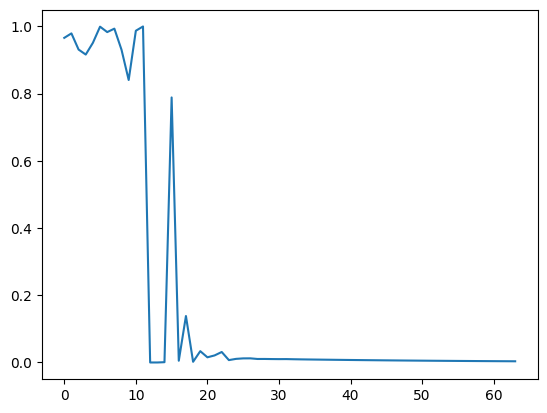

In [71]:
# consumption augment
import torch
import matplotlib.pyplot as plt


time = (torch.arange(64) - 12).float() * 200
is_positive = time >= 0

consumption = torch.ones_like(time)
consumption[is_positive] *= -1

t1 = time[is_positive][0]
consumption += -(time - t1) * 0.04e-3
consumption += torch.randn_like(consumption) * (((time - t1) / 1.6e+3).square() * -1).exp()

consumption = torch.sigmoid(consumption * 4)

plt.plot(consumption)